# 2 - Linear Model Training Notebook 

In [1]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/src')
import pandas as pd
import misc

%load_ext autoreload
%autoreload 2

Load the data

In [2]:
df = misc.load_processed_dataset("aapl", "2018-01-01", "2023-01-1")

Feature selection

In [4]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Close Forecast', 'Close_T-1', 'Close_T-2', 'Close_T-5', 'SMA_10',
       'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'RSI_14',
       'upper_band', 'middle_band', 'lower_band', 'macd', 'macdsignal',
       'macdhist', 'OBV', 'ADX', 'AD', 'Aroon_down', 'Aroon_up', 'SlowK',
       'SlowD', 'Williams %R', 'pct_change', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'S&P Close']
df = df[features]

Dataset splitting

In [5]:
X_train, X_test, Y_train, Y_test = misc.create_train_test_set(df, 0.8, verbose=False)

In [6]:
X_train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_T-1,Close_T-2,Close_T-5,...,Williams %R,pct_change,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,S&P Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 05:00:00,40.175158,40.680417,39.962664,40.670971,102223600,0.0,0.0,39.955585,40.392380,41.320259,...,-61.905020,0.017905,1,1,1,2018,2,2,1,2695.810059
2018-01-03 05:00:00,40.734722,41.211650,40.600146,40.663891,118071600,0.0,0.0,40.670971,39.955585,40.271961,...,-62.280802,-0.000174,2,1,1,2018,3,3,1,2713.060059
2018-01-04 05:00:00,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,40.663891,40.670971,40.279041,...,-52.255774,0.004645,3,1,1,2018,4,4,1,2723.989990
2018-01-05 05:00:00,40.949571,41.405247,40.857492,41.317890,94640000,0.0,0.0,40.852772,40.663891,40.392380,...,-27.569190,0.011385,4,1,1,2018,5,5,1,2743.149902
2018-01-08 05:00:00,41.164429,41.461916,41.065263,41.164429,82271200,0.0,0.0,41.317890,40.852772,39.955585,...,-35.714297,-0.003714,0,1,1,2018,8,8,2,2747.709961


Model creation and training

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)  
preds = model.predict(X_test)
preds = pd.Series(preds, index=Y_test.index)

Model 

Model(s) training

In [ ]:
def train_model(N):
    """
    N : number of previous values to use to predict (lookback)
    """
    preds = []
    for i in range(train_split, len(df)):
        X_train = train.iloc[i-N:i]
        Y_train = test.iloc[i-N:i] 
        model.fit(X_train, Y_train)        
        pred = model.predict(train.iloc[i:i+1])
        preds.append(pred[0])  
    preds = pd.Series(preds, index=Y_test.index)
    preds[preds < 0] = 0
    misc.plot(preds, Y_test)

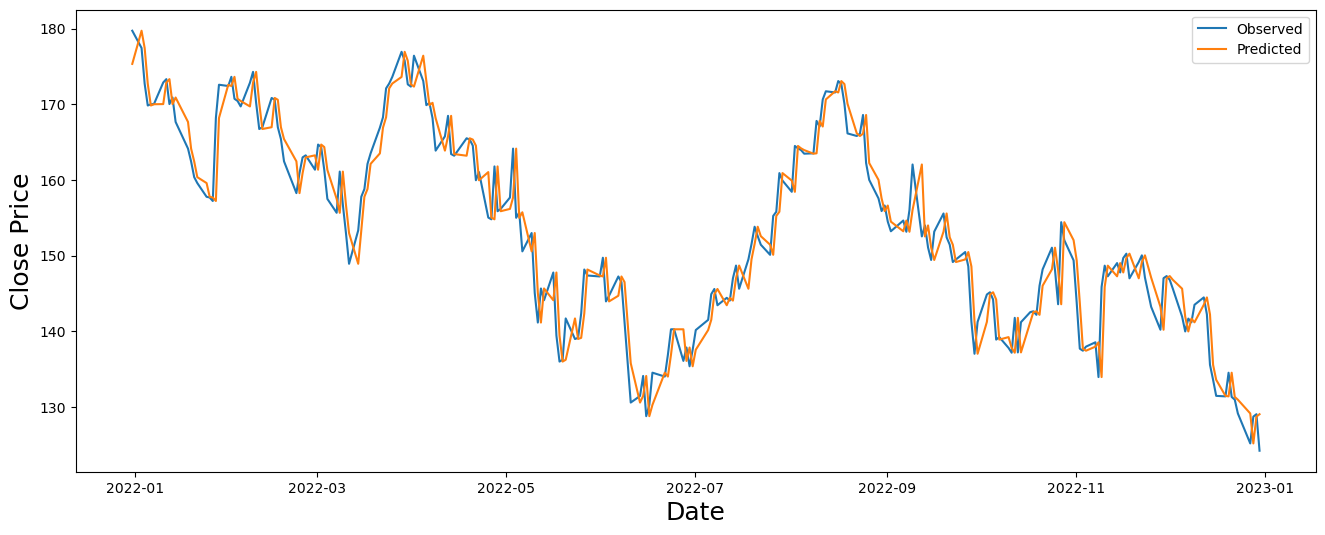

In [18]:
train_split = int(len(df) * 0.8)
train = df.drop("Close Forecast", axis=1)
test = df["Close Forecast"]
N_max = 50
RMSEs = []
for n in range(1, N_max, 50):
    preds = []
    for i in range(train_split, len(df)):
        X_train = train.iloc[i-n:i]
        Y_train = test.iloc[i-n:i] 
        model.fit(X_train, Y_train)        
        pred = model.predict(train.iloc[i:i+1])
        preds.append(pred[0])  
    preds = pd.Series(preds, index=Y_test.index)
    preds[preds < 0] = 0
    misc.plot(preds, Y_test)

Model predictions

In [11]:
preds = model.predict(X_test)
preds = pd.Series(preds, index=Y_test.index)

Visualisation

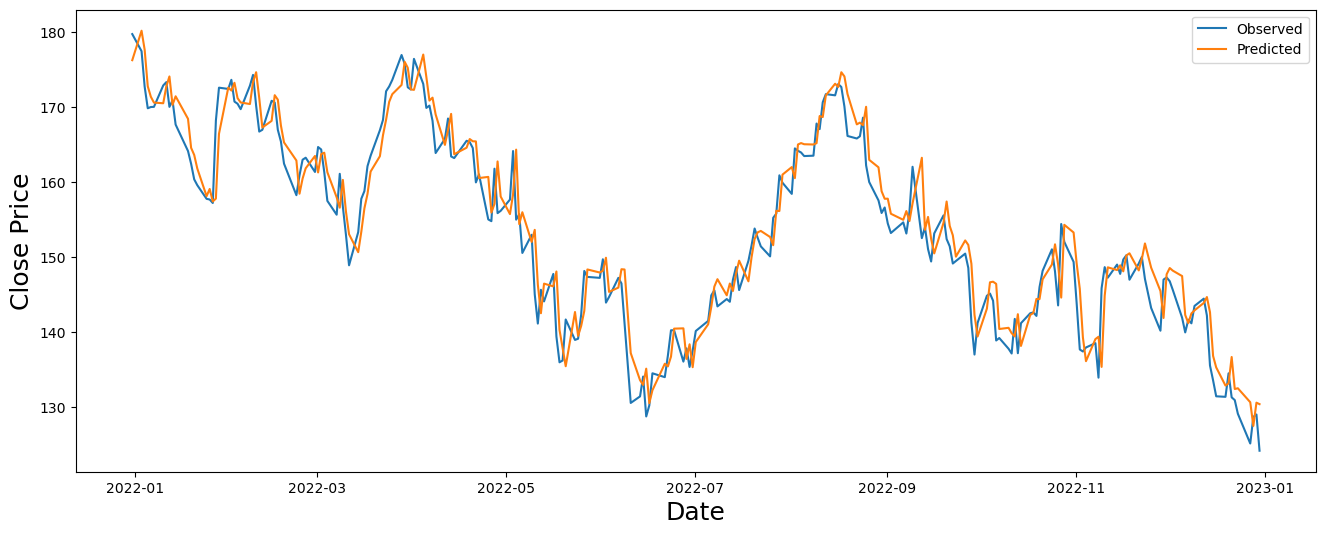

In [12]:
misc.plot(preds, Y_test)

Evaluate

In [ ]:
misc.evaluate(preds, Y_test, verbose=True)

R^2: 0.9303330122839852
MSE: 11.482614162149341
RMSE: 3.3886006200420464
MAE: 2.6411944192553323
MAPE: 1.7461289574429155


(0.9303330122839852,
 11.482614162149341,
 3.3886006200420464,
 2.6411944192553323,
 1.7461289574429155)